# Hierarchical Risk Parity

HRP is a modern portfolio optimization method inspired by machine learning.

The idea is that by examining the hierarchical structure of the market, we can better diversify.

In this work, we will:

- Download data for HRP
- Use HRP to find the minimum variance portfolio
- Plotting dendrograms



## Downloading data

HRP only requires historical returns

In [ ]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

pypfopt.__version__

'1.5.4'

In [ ]:
tickers = ['MARUTI.NS','RELIANCE.NS','AWL.NS','HINDUNILVR.NS']

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  4 of 4 completed


,AWL.NS,HINDUNILVR.NS,MARUTI.NS,RELIANCE.NS
Date,,,,
2023-02-27,344.450012,2468.149902,8632.200195,2367.850098
2023-02-28,361.649994,2460.649902,8624.349609,2322.550049
2023-03-01,379.700012,2466.250000,8764.150391,2343.899902
2023-03-02,398.649994,2455.350098,8548.750000,2326.050049
2023-03-03,418.549988,2471.000000,8601.250000,2385.399902


In [ ]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AWL.NS,HINDUNILVR.NS,MARUTI.NS,RELIANCE.NS
Date,,,,
2023-02-27,-0.049924,-0.006461,-0.003268,-0.006649
2023-02-28,0.049935,-0.003039,-0.000909,-0.019131
2023-03-01,0.049910,0.002276,0.016210,0.009192
2023-03-02,0.049908,-0.004420,-0.024577,-0.007615
2023-03-03,0.049918,0.006374,0.006141,0.025515


## HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.

In [ ]:
from pypfopt import HRPOpt

In [ ]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AWL.NS', 0.10386),
             ('HINDUNILVR.NS', 0.45657),
             ('MARUTI.NS', 0.28806),
             ('RELIANCE.NS', 0.15151)])

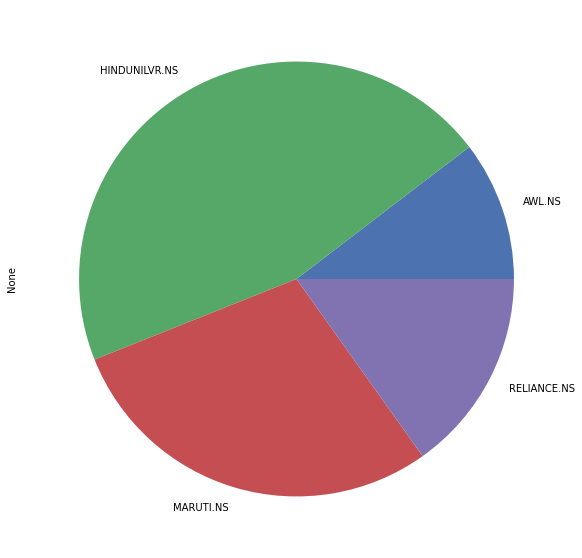

In [ ]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [ ]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 27.7%
Annual volatility: 24.0%
Sharpe Ratio: 1.07


## Plotting

It is very simple to plot a dendrogram (tree diagram) based on the hierarchical structure of asset returns

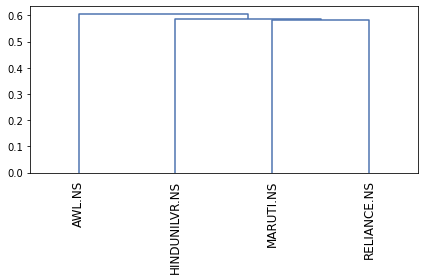

In [ ]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp);

If you look at this dendogram closely, you can see that most of the clusters make a lot of sense. For example, MARUTI  and RELIANCE  are grouped.